---

Produzindo Mapas de **Relevo** com **Google Earth Engine (GEE)**.

---

**Descrição:** Nesta aula aprenderemos como gerar mapas de elevação para uma região através do Google Earth Engine (GEE). Serão realizados o processamento de recortar o dados para a região desejadada, plotar no geemap, salvar em arquivo netcdf e plotar a figura pelo proplot.


---



**DADOS DE ENTRADA**: Base de dados de elevação digital de terreno do Shuttle Radar Topography Mission (SRTM).

- **Base de dados:** [SRTM Digital Elevation Data Version 4](https://developers.google.com/earth-engine/datasets/catalog/CGIAR_SRTM90_V4)
- **Período:** 2000-02-11T00:00:00Z–2000-02-22T00:00:00
- **Fornecedor:** [NASA/CGIAR](https://srtm.csi.cgiar.org/)
- **Earth Engine Snippet:** ee.Image("CGIAR/SRTM90_V4")
- **Resolução espacial:** 90 m
- **Resolução temporal:** Não tem

---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Arquivo netcdf e figura  
- **Formato do dado:** arquivos NC e PNG
- **Informações/dados gerados:**
    1. relevo_1km.nc
    2. mapa_relevo.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Inicializando GEE
2.   Mapa de elevação para um determinado **Estado**
3.   **Salva** arquivo **Netcdf** com os dados de elevação
4.   **Plotando** e salvando uma **figura** de elevação com o Proplot


---
**OBSERVAÇÕES IMPORTANTES**:
1. Criar conta no Google Earth Engine

---
- **Realizado por:**  Enrique V. Mattos - 18/09/2022
- **Atualizado por:** Enrique V. Mattos - 17/07/2023

---

**Contato:** Enrique Vieira Mattos - IRN/UNIFEI - (enrique@unifei.edu.br)


---









# **1° Passo:** Inicializando GEE

In [1]:
# instalando geemap
!pip install geemap -q

In [2]:
# importando GEE e geemap
import ee
import geemap

In [3]:
# inicializando GEE
geemap.ee_initialize()

#**PARTE 1):** Mapa de elevação para um determinado **Estado**

**Mapa de elevação**

In [4]:
# parâmetros da figura
vis = {'min': 0, 'max': 1500, 'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# região de estudo
roi = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Minas Gerais')) # selecionando um estado
#roi = ee.Geometry.Rectangle([-65., -20., -45., -5]) #lonlin,latmin,lonmax,latmax - selecionando um quadrado como região

# carregando os dados
elevacao = ee.Image('CGIAR/SRTM90_V4')

# cria a moldura do mapa
Map = geemap.Map()

# centraliza o mapa
Map.centerObject(roi)

# contorno do Brasil
Map.addLayer(roi, {}, 'região')

# plotando mapa
Map.addLayer(elevacao.clip(roi), vis, 'SRTM')

# barra de cores
Map.add_colorbar(vis, label='Elevação (m)', orientation='vertical')

# exibe na tela
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

**Salva arquivo Netcdf com os dados de elevação**

In [10]:
# instalando a biblioteca wxee usada para climatologias
!pip install wxee -q

# importando a biblioteca wxee
import wxee

# convertendo para xarray.Dataset
#forma a) quando ler o roi pelo Gee. Exemplo: roi = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Minas Gerais'))
ds = elevacao.clip(roi).wx.to_xarray(region=roi.geometry(), scale=1000)

#forma b) quando dezenhar a geometria. Exemplo: roi = ee.Geometry.Rectangle([-65., -20., -45., -5]) #lonlin,latmin,lonmax,latmax
#ds = elevacao.clip(roi).wx.to_xarray(region=roi, scale=1000)

# salva os dados para um arquivo netcdf
ds.to_netcdf('relevo_1km.nc')

# mostrando os dados
ds

Downloading:   0%|          | 0.00/842k [00:00<?, ?iB/s]

<xarray.Dataset>
Dimensions:      (time: 1, x: 1247, y: 968)
Coordinates:
  * time         (time) datetime64[ns] 2000-02-11
  * x            (x) float64 -51.05 -51.04 -51.03 ... -39.87 -39.86 -39.85
  * y            (y) float64 -14.23 -14.24 -14.25 -14.26 ... -22.9 -22.91 -22.92
    spatial_ref  int64 0
Data variables:
    elevation    (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

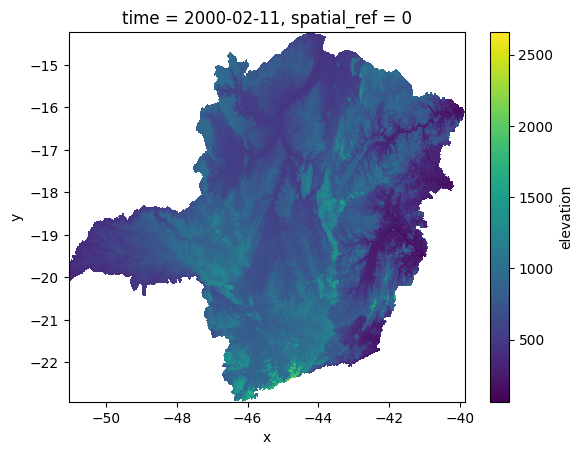

In [6]:
ds['elevation'].plot()

**Plotando figura com Proplot**

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

# Instalando o Salem (usado para mascarar regiões)
!pip install rasterio
!pip install pyproj
!pip install geopandas
!pip install salem

Chegando aqui, será necessário fazer a tediosa **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [8]:
# importa salem
import salem

# baixando o arquivo shapefile do Brasil
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip -o /content/br_unidades_da_federacao.zip

# lendo shapefile de todos Estados do Brasil
estados = salem.read_shapefile('/content/BR_UF_2019.shp')

# seleciona alguns estados
estado = estados.loc[estados['SIGLA_UF'] == 'MG']
estado

--2023-07-17 20:41:33--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
16,31,Minas Gerais,MG,Sudeste,"POLYGON ((-50.74208 -19.21384, -50.74241 -19.2...",-51.046082,-39.856829,-22.922755,-14.233181


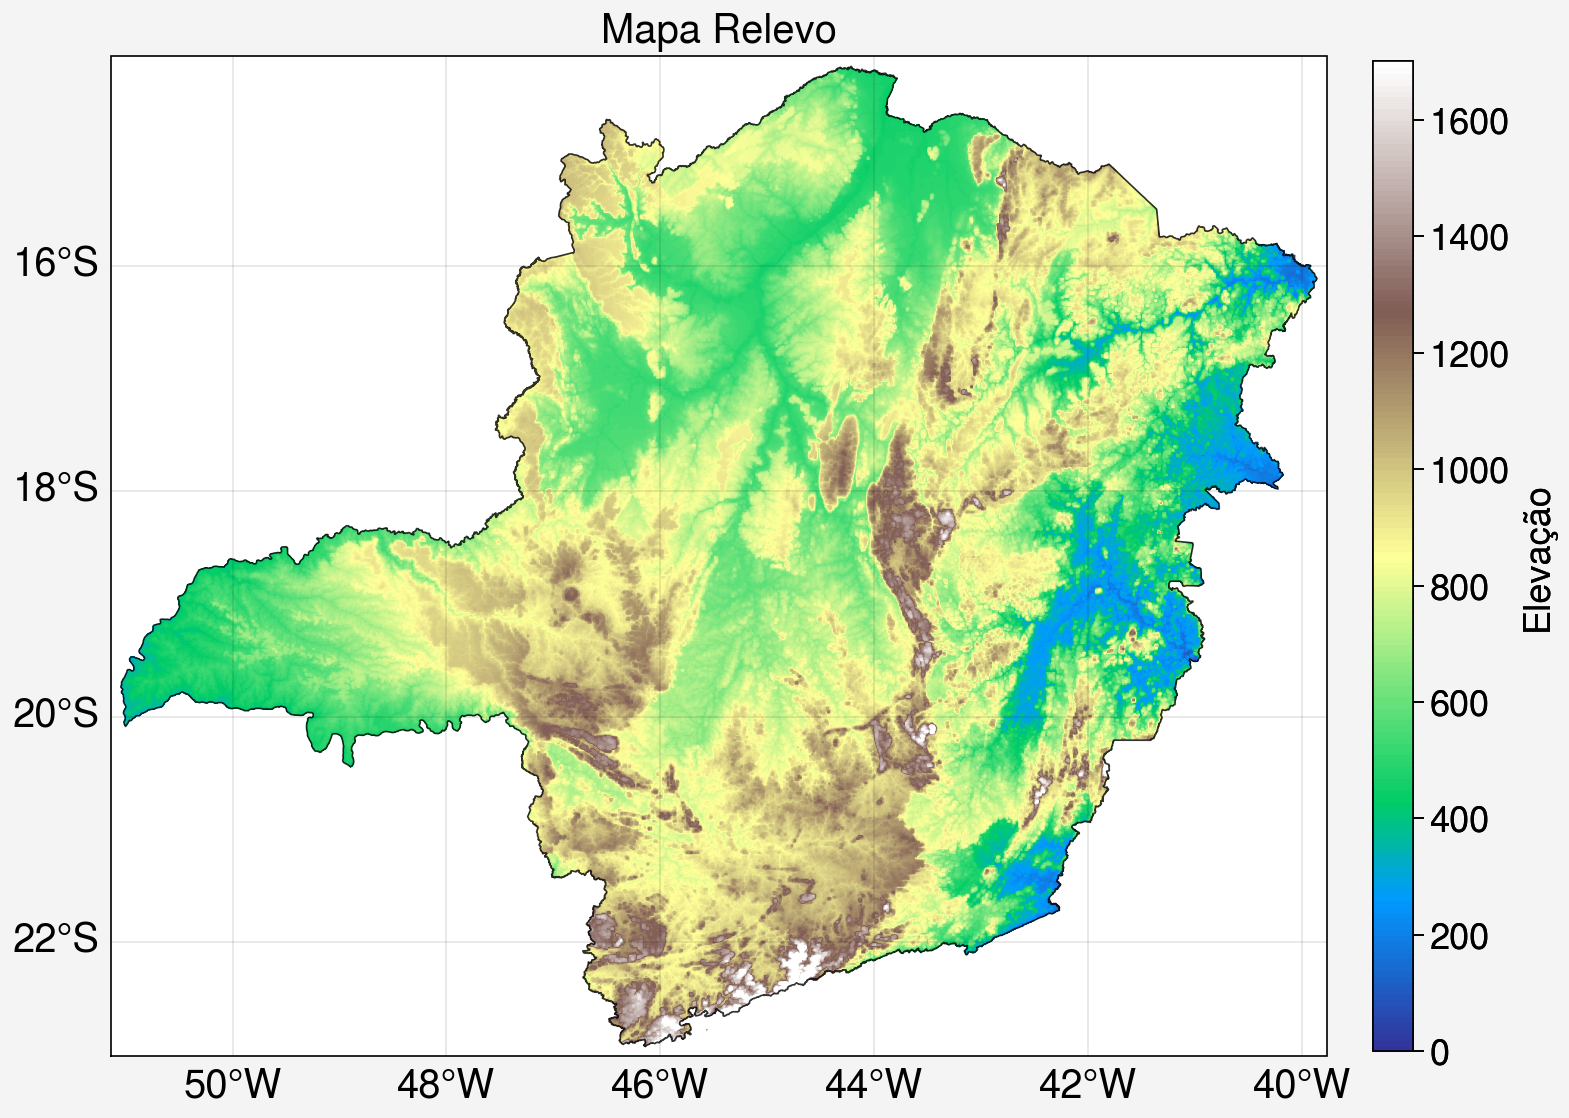

In [11]:
# importando bibliotecas
import proplot as pplt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

# leitura do arquivo
ds = xr.open_dataset('/content/relevo_1km.nc')

# moldura da figura
fig, ax = pplt.subplots(axheight=5, tight=True, proj='pcarree')

# recorta o dado para uma região
dsr = ds.salem.roi(shape=estado)

# mapa de contornos preenchidos
map1 = ax.contourf(dsr['x'],
                   dsr['y'],
                   dsr['elevation'][0,:,:],
                   cmap='terrain',
                   levels=pplt.arange(0, 1700, 10))

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False, labels=True,
          latlines=2, lonlines=2,
          latlim=(float(dsr['y'][0])+0.09, float(dsr['y'][-1])-0.09),
          lonlim=(float(dsr['x'][0])-0.09, float(dsr['x'][-1])+0.09),
          title='Mapa Relevo',
          small='20px', large='20px')

# plota contorno do Estado
estado.plot(edgecolor='black', facecolor='none', linewidth=0.6, alpha=0.8, ax=ax)

# barra de cores
fig.colorbar(map1, loc='r', label='Elevação', ticks=200, ticklabelsize=13, labelsize=13, space=-0.9, length=0.99)

# salvar a figura
fig.save('mapa_relevo.png', dpi=300)